In [1]:
# Importing libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Initialise variables for use
day_part_value = 'Breakfast'

In [3]:
# Reading the data
df = pd.read_csv(r"C:\Users\admin\Documents\Learning\MTech (EBAC)\Year 2\Capstone\Phase 2\Data\Data - No RegSales No Null Neg or 0.csv")
weather = pd.read_csv(r"C:\Users\admin\Documents\Learning\MTech (EBAC)\Year 2\Capstone\Phase 2\Data/finalweather_columns.csv")
weather.head()

,datetime,tempmin,temp_diff,temp_mean,humidity,temp_humidity_interaction,precip,precipprob,precipcover,cloudcover,day_of_week,is_weekend
0,2021-01-08,24.7,3.3,26.35,91.1,2350.38,36.211,1,0.2917,0.796,4,0
1,2021-01-09,24.3,3.7,26.15,89.2,2310.28,13.787,1,0.1667,0.864,5,1
2,2021-01-10,24.0,0.7,24.35,98.5,2373.85,201.111,1,0.3333,0.969,6,1
3,2021-01-11,24.0,4.7,26.35,89.0,2296.20,3.352,1,0.2500,0.858,0,0
4,2021-01-12,24.0,5.0,26.50,88.7,2270.72,13.615,1,0.2917,0.829,1,0


In [4]:
# Read only relevant data for the mentioned day part
print("The selected day part is : {}".format(day_part_value))

df_daypart = df[df['Day Part'] == day_part_value]
df_daypart['Total Sales'] = df_daypart['Total Sales'].round(0).astype(int)
df_daypart

The selected day part is : Breakfast


,Address,Architecture Group,Architecture Type,Calendar Date,City,Country,Country Code,Day Part,DFP,Dining Room Code,...,Sold Type Adjusted,Status,Week Start Date,Ala Carte Amt,BURGERS_FOR_BREAKFAST_FLAG,LATE_NIGHT_MENU_FLAG,Number of Records,SERVICE_MODE_DSTN_ID,Total Quantity,Total Sales
32,The Nex,Inline Hosted,Inline,25/3/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,22/3/2021,$4.58,0,0,1,15,2,6
33,The Nex,Inline Hosted,Inline,25/3/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,22/3/2021,$3.64,0,0,1,10,3,7
34,The Nex,Inline Hosted,Inline,25/3/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,22/3/2021,$3.64,0,0,1,0,1,2
35,The Nex,Inline Hosted,Inline,26/6/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,21/6/2021,$3.64,0,0,1,1,2,5
37,The Nex,Inline Hosted,Inline,26/6/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,21/6/2021,$3.64,0,0,1,10,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020097,The Nex,Inline Hosted,Inline,10/6/2022,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,6/6/2022,$4.21,0,0,1,0,1,3
1020098,The Nex,Inline Hosted,Inline,14/11/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,A La Carte,Open,8/11/2021,$4.21,0,0,1,0,1,4
1020099,The Nex,Inline Hosted,Inline,7/8/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,2/8/2021,$4.21,0,0,1,1,1,3
1020100,The Nex,Inline Hosted,Inline,25/7/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,A La Carte,Open,19/7/2021,$4.21,0,0,1,1,1,4


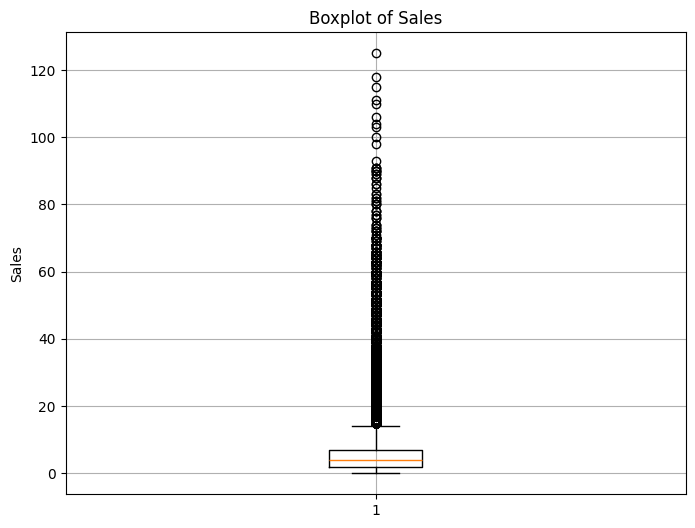

In [5]:
# Create a boxplot of sales
plt.figure(figsize=(8, 6))
plt.boxplot(df_daypart['Total Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [6]:
# Calculate quartiles and IQR
q1 = np.percentile(df_daypart['Total Sales'], 25)
q2 = np.percentile(df_daypart['Total Sales'], 50)
q3 = np.percentile(df_daypart['Total Sales'], 75)
iqr1 = q2 - q1
iqr2 = q3 - q2
iqr3 = np.percentile(df_daypart['Total Sales'], 75) - np.percentile(df_daypart['Total Sales'], 25)

# Print out the 1st, 2nd (median), and 3rd IQR
print(f"1st IQR: {iqr1}")
print(f"2nd IQR (Median): {iqr2}")
print(f"3rd IQR: {iqr3}")
print(f"Max value to go 1.5x below 1st IQR: {iqr1/1.5}")
print(f"Max value to go 1.5x above 3rd IQR: {iqr3*1.5}")

1st IQR: 2.0
2nd IQR (Median): 3.0
3rd IQR: 5.0
Max value to go 1.5x below 1st IQR: 1.3333333333333333
Max value to go 1.5x above 3rd IQR: 7.5


In [7]:
# Only care about transactions that falls within 1.5x below & above 1st and 3rd Quartile
non_outliers_df= pd.DataFrame(df_daypart[(df_daypart['Total Sales'] > iqr1/1.5) | (df_daypart['Total Sales'] < iqr3*1.5)])
non_outliers_df.head()

,Address,Architecture Group,Architecture Type,Calendar Date,City,Country,Country Code,Day Part,DFP,Dining Room Code,...,Sold Type Adjusted,Status,Week Start Date,Ala Carte Amt,BURGERS_FOR_BREAKFAST_FLAG,LATE_NIGHT_MENU_FLAG,Number of Records,SERVICE_MODE_DSTN_ID,Total Quantity,Total Sales
32,The Nex,Inline Hosted,Inline,25/3/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,22/3/2021,$4.58,0,0,1,15,2,6
33,The Nex,Inline Hosted,Inline,25/3/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,22/3/2021,$3.64,0,0,1,10,3,7
34,The Nex,Inline Hosted,Inline,25/3/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,22/3/2021,$3.64,0,0,1,0,1,2
35,The Nex,Inline Hosted,Inline,26/6/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,21/6/2021,$3.64,0,0,1,1,2,5
37,The Nex,Inline Hosted,Inline,26/6/2021,Singapore,Singapore,SG,Breakfast,Gladys Lim,20/20 Garden Grill,...,Combo Meal,Open,21/6/2021,$3.64,0,0,1,10,4,9


In [8]:
# Reformat date column to a datetime object
non_outliers_df['Calendar Date'] = pd.to_datetime(non_outliers_df['Calendar Date'],format = '%d/%m/%Y')
weather['datetime'] = pd.to_datetime(weather['datetime'],format = '%Y-%m-%d')

# Aggregate by daily sales
daily_sales = non_outliers_df.groupby(['Calendar Date'])['Total Sales'].sum().reset_index()
daily_sales

,Calendar Date,Total Sales
0,2021-01-01,602
1,2021-01-02,495
2,2021-01-03,970
3,2021-01-04,264
4,2021-01-05,297
...,...,...
1085,2023-12-27,310
1086,2023-12-28,339
1087,2023-12-29,279
1088,2023-12-30,474


In [9]:
# Only 1090 dates. 
date_counts = daily_sales['Calendar Date'].unique().value_counts()
date_counts

2021-01-01    1
2021-01-02    1
2021-01-03    1
2021-01-04    1
2021-01-05    1
             ..
2023-12-27    1
2023-12-28    1
2023-12-29    1
2023-12-30    1
2023-12-31    1
Name: count, Length: 1090, dtype: int64

In [10]:
# Detect the rows that are missing
full_date_range = pd.date_range(start='2021-01-01', end='2023-12-31')

dates_in_df = pd.to_datetime(daily_sales['Calendar Date'])

missing_dates = full_date_range.difference(dates_in_df)

# Print the missing dates
print("\nMissing Dates:")
print(missing_dates)



Missing Dates:
DatetimeIndex(['2023-08-09', '2023-08-19', '2023-10-19', '2023-10-23',
               '2023-11-01'],
              dtype='datetime64[ns]', freq=None)


In [11]:
daily_sales.set_index('Calendar Date',inplace=True)

# Reindex the DataFrame to include the complete date range

daily_sales = daily_sales.reindex(full_date_range)
daily_sales

,Total Sales
2021-01-01,602.0
2021-01-02,495.0
2021-01-03,970.0
2021-01-04,264.0
2021-01-05,297.0
...,...
2023-12-27,310.0
2023-12-28,339.0
2023-12-29,279.0
2023-12-30,474.0


In [12]:
median_2023 = daily_sales.loc['2023', 'Total Sales'].median()
median_2023

350.5

In [13]:
daily_sales.loc['2023', 'Total Sales'] = daily_sales.loc['2023', 'Total Sales'].fillna(median_2023)
daily_sales.reset_index(inplace=True)

In [14]:
daily_sales.rename(columns={'index': 'Calendar Date'}, inplace=True)

# Convert the values to integers
daily_sales['Total Sales'] = daily_sales['Total Sales'].astype(int)
daily_sales.head()


,Calendar Date,Total Sales
0,2021-01-01,602
1,2021-01-02,495
2,2021-01-03,970
3,2021-01-04,264
4,2021-01-05,297


In [15]:
daily_sales = pd.merge(daily_sales, weather, left_on='Calendar Date', right_on='datetime', how='left')

# Define the cutoff date
cutoff_date = pd.to_datetime('8 Jan 2021')

# Filter out rows with dates on or before the cutoff date
daily_sales = daily_sales[daily_sales['Calendar Date'] > cutoff_date]
daily_sales

,Calendar Date,Total Sales,datetime,tempmin,temp_diff,temp_mean,humidity,temp_humidity_interaction,precip,precipprob,precipcover,cloudcover,day_of_week,is_weekend
8,2021-01-09,679,2021-01-09,24.3,3.7,26.15,89.2,2310.28,13.787,1.0,0.1667,0.864,5.0,1.0
9,2021-01-10,682,2021-01-10,24.0,0.7,24.35,98.5,2373.85,201.111,1.0,0.3333,0.969,6.0,1.0
10,2021-01-11,384,2021-01-11,24.0,4.7,26.35,89.0,2296.20,3.352,1.0,0.2500,0.858,0.0,0.0
11,2021-01-12,196,2021-01-12,24.0,5.0,26.50,88.7,2270.72,13.615,1.0,0.2917,0.829,1.0,0.0
12,2021-01-13,255,2021-01-13,24.0,3.7,25.85,85.2,2181.12,2.018,1.0,0.1250,0.857,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,310,2023-12-27,25.0,3.9,26.95,91.7,2411.71,23.368,1.0,0.1667,0.821,2.0,0.0
1091,2023-12-28,339,2023-12-28,25.0,6.0,28.00,90.4,2413.68,10.394,1.0,0.1667,0.799,3.0,0.0
1092,2023-12-29,279,2023-12-29,25.0,6.7,28.35,85.7,2365.32,35.371,1.0,0.0833,0.879,4.0,0.0
1093,2023-12-30,474,2023-12-30,26.0,5.7,28.85,80.6,2305.16,0.240,1.0,0.0833,0.848,5.0,1.0


In [16]:
daily_sales.dtypes

Calendar Date                datetime64[ns]
Total Sales                           int32
datetime                     datetime64[ns]
tempmin                             float64
temp_diff                           float64
temp_mean                           float64
humidity                            float64
temp_humidity_interaction           float64
precip                              float64
precipprob                          float64
precipcover                         float64
cloudcover                          float64
day_of_week                         float64
is_weekend                          float64
dtype: object

In [17]:
# Sort the DataFrame by date
daily_sales.sort_values('Calendar Date', inplace=True)
daily_sales['Date'] = (daily_sales['Calendar Date'] - daily_sales['Calendar Date'].min()).dt.days
daily_sales

,Calendar Date,Total Sales,datetime,tempmin,temp_diff,temp_mean,humidity,temp_humidity_interaction,precip,precipprob,precipcover,cloudcover,day_of_week,is_weekend,Date
8,2021-01-09,679,2021-01-09,24.3,3.7,26.15,89.2,2310.28,13.787,1.0,0.1667,0.864,5.0,1.0,0
9,2021-01-10,682,2021-01-10,24.0,0.7,24.35,98.5,2373.85,201.111,1.0,0.3333,0.969,6.0,1.0,1
10,2021-01-11,384,2021-01-11,24.0,4.7,26.35,89.0,2296.20,3.352,1.0,0.2500,0.858,0.0,0.0,2
11,2021-01-12,196,2021-01-12,24.0,5.0,26.50,88.7,2270.72,13.615,1.0,0.2917,0.829,1.0,0.0,3
12,2021-01-13,255,2021-01-13,24.0,3.7,25.85,85.2,2181.12,2.018,1.0,0.1250,0.857,2.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,310,2023-12-27,25.0,3.9,26.95,91.7,2411.71,23.368,1.0,0.1667,0.821,2.0,0.0,1082
1091,2023-12-28,339,2023-12-28,25.0,6.0,28.00,90.4,2413.68,10.394,1.0,0.1667,0.799,3.0,0.0,1083
1092,2023-12-29,279,2023-12-29,25.0,6.7,28.35,85.7,2365.32,35.371,1.0,0.0833,0.879,4.0,0.0,1084
1093,2023-12-30,474,2023-12-30,26.0,5.7,28.85,80.6,2305.16,0.240,1.0,0.0833,0.848,5.0,1.0,1085


# Create a Daily, Moving Average (3 months) & LAG (3 months)

In [18]:
daily_sales['3_month_MA'] = daily_sales['Total Sales'].rolling(window=3).mean()
daily_sales['3_month_MA'] = daily_sales['3_month_MA'].round()

daily_sales['3_month_lag'] = daily_sales['Total Sales'].shift(3)
daily_sales['3_month_lag'] = daily_sales['3_month_lag'].round()

daily_sales

,Calendar Date,Total Sales,datetime,tempmin,temp_diff,temp_mean,humidity,temp_humidity_interaction,precip,precipprob,precipcover,cloudcover,day_of_week,is_weekend,Date,3_month_MA,3_month_lag
8,2021-01-09,679,2021-01-09,24.3,3.7,26.15,89.2,2310.28,13.787,1.0,0.1667,0.864,5.0,1.0,0,NaN,NaN
9,2021-01-10,682,2021-01-10,24.0,0.7,24.35,98.5,2373.85,201.111,1.0,0.3333,0.969,6.0,1.0,1,NaN,NaN
10,2021-01-11,384,2021-01-11,24.0,4.7,26.35,89.0,2296.20,3.352,1.0,0.2500,0.858,0.0,0.0,2,582.0,NaN
11,2021-01-12,196,2021-01-12,24.0,5.0,26.50,88.7,2270.72,13.615,1.0,0.2917,0.829,1.0,0.0,3,421.0,679.0
12,2021-01-13,255,2021-01-13,24.0,3.7,25.85,85.2,2181.12,2.018,1.0,0.1250,0.857,2.0,0.0,4,278.0,682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,310,2023-12-27,25.0,3.9,26.95,91.7,2411.71,23.368,1.0,0.1667,0.821,2.0,0.0,1082,372.0,855.0
1091,2023-12-28,339,2023-12-28,25.0,6.0,28.00,90.4,2413.68,10.394,1.0,0.1667,0.799,3.0,0.0,1083,334.0,452.0
1092,2023-12-29,279,2023-12-29,25.0,6.7,28.35,85.7,2365.32,35.371,1.0,0.0833,0.879,4.0,0.0,1084,309.0,354.0
1093,2023-12-30,474,2023-12-30,26.0,5.7,28.85,80.6,2305.16,0.240,1.0,0.0833,0.848,5.0,1.0,1085,364.0,310.0


# Create the Algorithms - Daily Sales

1. RandomForest Regressor
2. Autoregressive Integrated Moving Average (ARIMA)
3. Seasonable Autoregression Integrated Moving Average (SARIMA)
2. Exponential Smoothing
3. Exponential Average

In [19]:
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(0)

In [20]:
# Create training & testing split
test_start_date = daily_sales['Date'].max() - 180  # Last 6 months for testing
test_start_date

train_data = daily_sales[daily_sales['Date'] < test_start_date]
test_data = daily_sales[daily_sales['Date'] >= test_start_date]
train_data

,Calendar Date,Total Sales,datetime,tempmin,temp_diff,temp_mean,humidity,temp_humidity_interaction,precip,precipprob,precipcover,cloudcover,day_of_week,is_weekend,Date,3_month_MA,3_month_lag
8,2021-01-09,679,2021-01-09,24.3,3.7,26.15,89.2,2310.28,13.787,1.0,0.1667,0.864,5.0,1.0,0,NaN,NaN
9,2021-01-10,682,2021-01-10,24.0,0.7,24.35,98.5,2373.85,201.111,1.0,0.3333,0.969,6.0,1.0,1,NaN,NaN
10,2021-01-11,384,2021-01-11,24.0,4.7,26.35,89.0,2296.20,3.352,1.0,0.2500,0.858,0.0,0.0,2,582.0,NaN
11,2021-01-12,196,2021-01-12,24.0,5.0,26.50,88.7,2270.72,13.615,1.0,0.2917,0.829,1.0,0.0,3,421.0,679.0
12,2021-01-13,255,2021-01-13,24.0,3.7,25.85,85.2,2181.12,2.018,1.0,0.1250,0.857,2.0,0.0,4,278.0,682.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,2023-06-29,626,2023-06-29,26.4,5.6,29.20,77.7,2268.84,5.577,1.0,0.0833,0.843,3.0,0.0,901,342.0,247.0
910,2023-06-30,208,2023-06-30,25.0,5.3,27.65,81.4,2311.76,1.091,1.0,0.0417,0.854,4.0,0.0,902,363.0,143.0
911,2023-07-01,616,2023-07-01,25.0,6.0,28.00,78.6,2192.94,33.149,1.0,0.0417,0.844,5.0,1.0,903,483.0,256.0
912,2023-07-02,482,2023-07-02,27.0,5.2,29.60,74.7,2196.18,0.000,0.0,0.0000,0.844,6.0,1.0,904,435.0,626.0


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# Training from 1 Jan 2021 -  30 June 2023
X_train = train_data[['Date','3_month_MA','3_month_lag','tempmin','temp_diff','temp_mean','humidity','temp_humidity_interaction','precip','precipprob','precipcover','cloudcover']]
y_train = train_data['Total Sales']

# Test 31 June 2023 - 31 December 2023
X_test = test_data[['Date','3_month_MA','3_month_lag','tempmin','temp_diff','temp_mean','humidity','temp_humidity_interaction','precip','precipprob','precipcover','cloudcover']]
y_test = test_data['Total Sales']


1. RandomForest Regressor

In [22]:
# Train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance (Optional)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 114.4339779005525
Mean Squared Error (MSE): 23971.825266850836
Root Mean Squared Error (RMSE): 154.82837358459474


2. ARIMA

In [23]:
# Handling NaNs: Drop rows with NaN values
arima_daily_sales = daily_sales.dropna()
arima_daily_sales

,Calendar Date,Total Sales,datetime,tempmin,temp_diff,temp_mean,humidity,temp_humidity_interaction,precip,precipprob,precipcover,cloudcover,day_of_week,is_weekend,Date,3_month_MA,3_month_lag
11,2021-01-12,196,2021-01-12,24.0,5.0,26.50,88.7,2270.72,13.615,1.0,0.2917,0.829,1.0,0.0,3,421.0,679.0
12,2021-01-13,255,2021-01-13,24.0,3.7,25.85,85.2,2181.12,2.018,1.0,0.1250,0.857,2.0,0.0,4,278.0,682.0
13,2021-01-14,234,2021-01-14,23.7,5.7,26.55,79.2,2082.96,0.020,1.0,0.0417,0.855,3.0,0.0,5,228.0,384.0
14,2021-01-15,253,2021-01-15,24.0,7.7,27.85,75.8,2069.34,0.000,0.0,0.0000,0.878,4.0,0.0,6,247.0,196.0
15,2021-01-16,624,2021-01-16,24.8,5.9,27.75,80.4,2194.92,0.000,0.0,0.0000,0.890,5.0,1.0,7,370.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,310,2023-12-27,25.0,3.9,26.95,91.7,2411.71,23.368,1.0,0.1667,0.821,2.0,0.0,1082,372.0,855.0
1091,2023-12-28,339,2023-12-28,25.0,6.0,28.00,90.4,2413.68,10.394,1.0,0.1667,0.799,3.0,0.0,1083,334.0,452.0
1092,2023-12-29,279,2023-12-29,25.0,6.7,28.35,85.7,2365.32,35.371,1.0,0.0833,0.879,4.0,0.0,1084,309.0,354.0
1093,2023-12-30,474,2023-12-30,26.0,5.7,28.85,80.6,2305.16,0.240,1.0,0.0833,0.848,5.0,1.0,1085,364.0,310.0


In [24]:
# Create training & testing split
test_start_date = daily_sales['Date'].max() - 180  # Last 6 months for testing
test_start_date

train_data = daily_sales[daily_sales['Date'] < test_start_date]
test_data = daily_sales[daily_sales['Date'] >= test_start_date]

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)


# Training from 1 Jan 2021 -  30 June 2023
X_train = train_data[['Date','3_month_MA','3_month_lag','tempmin','temp_diff','temp_mean','humidity','temp_humidity_interaction','precip','precipprob','precipcover','cloudcover']]
y_train = train_data['Total Sales']

# Test 31 June 2023 - 31 December 2023
X_test = test_data[['Date','3_month_MA','3_month_lag','tempmin','temp_diff','temp_mean','humidity','temp_humidity_interaction','precip','precipprob','precipcover','cloudcover']]
y_test = test_data['Total Sales']


# Training from 1 Jan 2021 -  30 June 2023
X_train = train_data[['Date','3_month_MA','3_month_lag']]
y_train = train_data['Total Sales']

# Test 31 June 2023 - 31 December 2023
X_test = test_data[['Date','3_month_MA','3_month_lag']]
y_test = test_data['Total Sales']

# Fit ARIMA model
arima_model = ARIMA(y_train, exog=X_train, order= (1, 1, 1)) # Example ARIMA order (p, d, q)
arima_results = arima_model.fit()

# Print model summary
print(arima_results.summary())

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Total Sales   No. Observations:                  903
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6130.219
Date:                Tue, 10 Sep 2024   AIC                          12272.439
Time:                        19:24:45   BIC                          12301.267
Sample:                             0   HQIC                         12283.450
                                - 903                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Date           -0.0240      0.050     -0.478      0.632      -0.122       0.074
3_month_MA      0.8234      0.052     15.710      0.000       0.721       0.926
3_month_lag    -0.2482      0.039     -6.332    

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


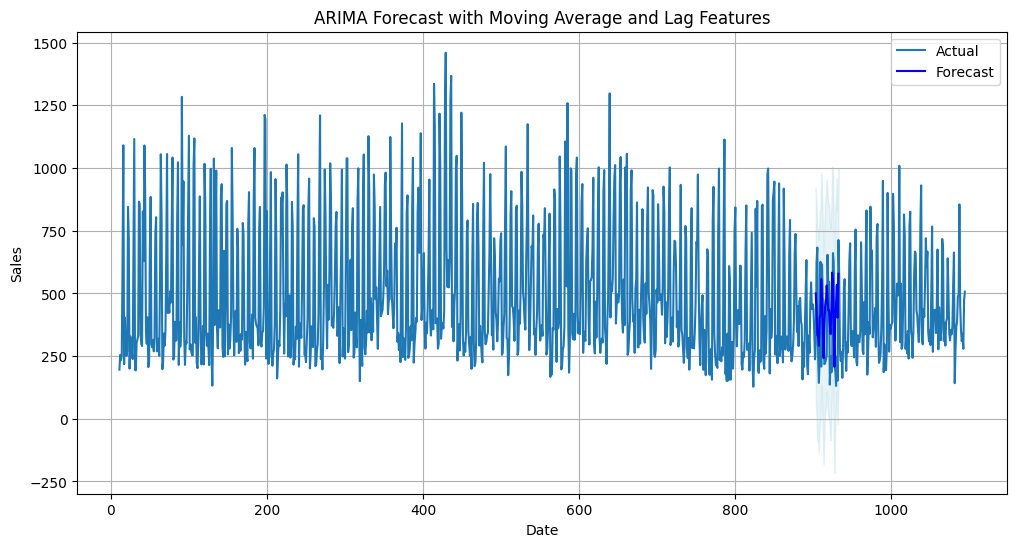

In [25]:
# Forecast using ARIMA model
forecast_steps = 30  # Example: forecast for the next 30 days
arima_forecast = arima_results.get_forecast(steps=forecast_steps, exog=X_train.iloc[-forecast_steps:])
arima_mean = arima_forecast.predicted_mean
arima_ci = arima_forecast.conf_int()

# Plot ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(arima_daily_sales.index, arima_daily_sales['Total Sales'], label='Actual')
plt.plot(arima_mean.index, arima_mean.values, color='blue', label='Forecast')
plt.fill_between(arima_ci.index, arima_ci.iloc[:, 0], arima_ci.iloc[:, 1], color='lightblue', alpha=0.3)
plt.title('ARIMA Forecast with Moving Average and Lag Features')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Make predictions on the testing set
y_pred = arima_results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Display predictions
#print("Predictions:", y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 119.18625635156596
Mean Squared Error (MSE): 23982.814154200278
Root Mean Squared Error (RMSE): 154.86385683625562


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


3. SARIMA

In [27]:
# Create training & testing split
test_start_date = daily_sales['Date'].max() - 180  # Last 6 months for testing
test_start_date

train_data = daily_sales[daily_sales['Date'] < test_start_date]
test_data = daily_sales[daily_sales['Date'] >= test_start_date]

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [28]:
model = SARIMAX(train_data['Total Sales'], exog=train_data[['Date','3_month_MA','3_month_lag'],
                order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example order (p, d, q), seasonal_order (P, D, Q, S)
model_fit = model.fit()

print(model_fit.summary())

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 1 (1557064679.py, line 2)

In [70]:
# Make predictions on the testing set with exogenous variables
start_index = len(train_data)
end_index = start_index + len(test_data) - 1
y_pred = model_fit.predict(start=start_index, end=end_index, exog=test_data[['Date','3_month_MA','3_month_lag','tempmin','temp_diff','temp_mean','humidity','temp_humidity_interaction','precip','precipprob','precipcover','cloudcover']])

# Display predictions
print("Predictions:", y_pred)

Predictions: 903     343.080978
904     348.859569
905     214.773866
906     249.606468
907     670.268034
           ...    
1079    293.241312
1080    335.151019
1081    319.261394
1082    428.493978
1083    452.117467
Name: predicted_mean, Length: 181, dtype: float64


In [71]:
# Display predictions
#print("Predictions:", y_pred)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 127.60149415207809
Mean Squared Error (MSE): 26756.082567041543
Root Mean Squared Error (RMSE): 163.57286623105173


4. Exponential Smoothing

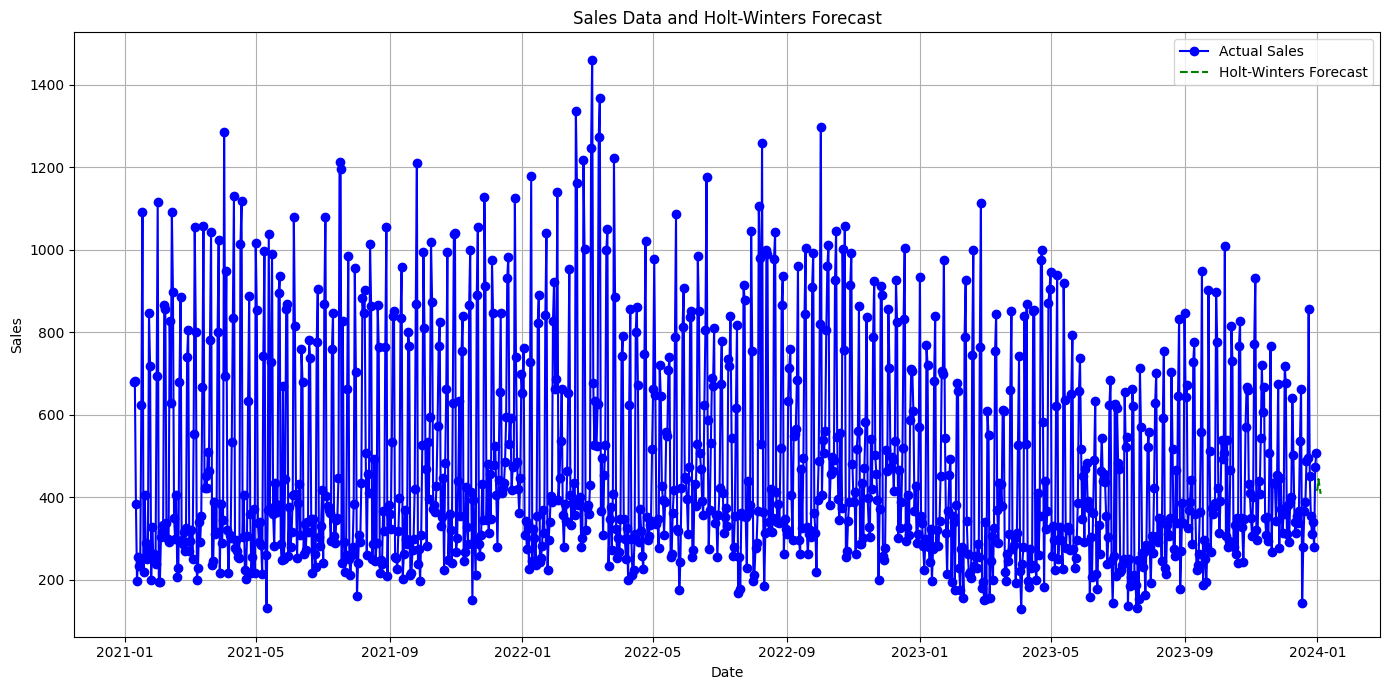

In [74]:
# X = daily_sales[['Date','3_month_MA','3_month_lag','tempmin','temp_diff','temp_mean','humidity','temp_humidity_interaction','precip','precipprob','precipcover','cloudcover']]
# Y = daily_sales['Total Sales']
# Best Parameters: {'seasonal': 'additive', 'smoothing_level': 0.1, 'smoothing_seasonal': 0.1, 'smoothing_trend': 0.1, 'trend': 'additive'}


# Fit Holt-Winters seasonal method (additive model)
model = ExponentialSmoothing(daily_sales['Total Sales'],trend='add', seasonal='add', seasonal_periods=6)
fit_model = model.fit(smoothing_level=0.1,smoothing_trend = 0.1, smoothing_seasonal = 0.1)

# Forecast using the fitted model
forecast = fit_model.forecast(5)  # Forecast the next 5 periods

# Plotting
plt.figure(figsize=(14, 7))

# Original sales data
plt.plot(daily_sales['Calendar Date'], daily_sales['Total Sales'], label='Actual Sales', marker='o', color='blue')

# Holt-Winters forecast
forecast_dates = pd.date_range(start=daily_sales['Calendar Date'].max(), periods=5, freq='D')
plt.plot(forecast_dates, forecast, label='Holt-Winters Forecast', linestyle='--', color='green')

# Customize plot
plt.title('Sales Data and Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

In [75]:
# Display predictions
#print("Predictions:", y_pred)

actual_values = daily_sales['Total Sales'].values[-5:]  # Assuming last 5 actual values for comparison

mae = mean_absolute_error(actual_values, forecast)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 99.569214074587
Mean Squared Error (MSE): 11351.980281539441
Root Mean Squared Error (RMSE): 106.54567227972913


In [77]:
!pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


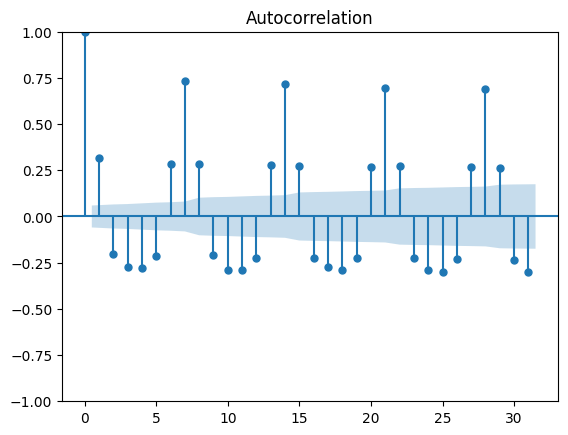

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


subset_data.set_index('Calendar Date', inplace=True)

# Plot the ACF
plot_acf(subset_data['Total Sales'])
plt.show()

In [80]:
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error


param_grid = {
    'trend': ['additive', 'multiplicative'],
    'seasonal': ['additive', 'multiplicative'],
    'smoothing_level': np.linspace(0.1, 1.0, 10),  # range for alpha
    'smoothing_trend': np.linspace(0.1, 1.0, 10),  # range for beta
    'smoothing_seasonal': np.linspace(0.1, 1.0, 10)  # range for gamma
}

In [81]:
daily_sales.set_index('Calendar Date', inplace=True)


In [82]:
from sklearn.model_selection import ParameterGrid, TimeSeriesSplit
from sklearn.metrics import mean_squared_error


param_grid = {
    'trend': ['additive', 'multiplicative'],
    'seasonal': ['additive', 'multiplicative'],
    'smoothing_level': np.linspace(0.1, 1.0, 10),  # range for alpha
    'smoothing_trend': np.linspace(0.1, 1.0, 10),  # range for beta
    'smoothing_seasonal': np.linspace(0.1, 1.0, 10)  # range for gamma
}


tscv = TimeSeriesSplit(n_splits=5)

# Initialize best score and parameters
best_score = float('inf')
best_params = None

# Grid Search
for params in ParameterGrid(param_grid):
    scores = []
    for train_index, test_index in tscv.split(daily_sales):
        train, test = daily_sales.iloc[train_index], daily_sales.iloc[test_index]
        
        # Fit the model with current parameters
        try:
            model = ExponentialSmoothing(
                train,
                trend=params['trend'],
                seasonal=params['seasonal'],
                seasonal_periods=6  # Based on the identified seasonality
            ).fit(
                smoothing_level=params['smoothing_level'],
                smoothing_trend=params['smoothing_trend'],
                smoothing_seasonal=params['smoothing_seasonal']
            )
            predictions = model.forecast(len(test))
            score = mean_squared_error(test, predictions)
            scores.append(score)
            
        except Exception as e:
            print(f"Failed with parameters: {params}. Error: {e}")  # Detailed error output
            break  # Stop the inner loop if fitting fails to avoid misleading averages

    # Check if scores were successfully added
    if scores:
        avg_score = np.mean(scores)
        if avg_score < best_score:
            best_score = avg_score
            best_params = params
    else:
        print(f"No valid score for parameters: {params}")

# Output the best parameters and score
if best_params:
    print(f"Best Parameters: {best_params}")
    print(f"Best MSE Score: {best_score}")
else:
    print("No valid parameter combination found.")

Failed with parameters: {'seasonal': 'additive', 'smoothing_level': 0.1, 'smoothing_seasonal': 0.1, 'smoothing_trend': 0.1, 'trend': 'additive'}. Error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
No valid score for parameters: {'seasonal': 'additive', 'smoothing_level': 0.1, 'smoothing_seasonal': 0.1, 'smoothing_trend': 0.1, 'trend': 'additive'}
Failed with parameters: {'seasonal': 'additive', 'smoothing_level': 0.1, 'smoothing_seasonal': 0.1, 'smoothing_trend': 0.1, 'trend': 'multiplicative'}. Error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
No valid score for parameters: {'seasonal': 'additive', 'smoothing_level': 0.1, 'smoothing_seasonal': 0.1, 'smoothing_trend': 0.1, 'trend': 'multiplicative'}
Failed with parameters: {'seasonal': 'additive', 'smoothing_level': 0.1, 'smoothing_seasonal': 0.1, 'smoothing_trend': 0.2, 'trend': 'additive'}. Error: Pandas data cast to numpy dtype of object. Check input data